# Exploratory Data Analysis (EDA) for Fraud Detection

### Import Libraries

In [3]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Set style for plots
plt.style.use('seaborn-v0_8')


### Create visualizations directory if it doesn't exist

In [2]:
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

### Load preprocessed data

In [5]:
fraud_data = pd.read_csv('../data/preprocessed_fraud_data.csv')
creditcard_data = pd.read_csv('../data/preprocessed_creditcard_data.csv')

### Basic Data Inspection

In [14]:
print("Fraud Data Sample:")
print(fraud_data.head(4))
print("\nCredit Card Data Sample:")
print(creditcard_data.head(4))

Fraud Data Sample:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   

       device_id source browser sex  age    ip_address  class  purchase_hour  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0              2   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0              1   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1             18   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             13   

   purchase_day_of_week  time_since_signup  ip_numeric        country  
0                     5        1251.856111   732758368          Japan  
1                     0           4.984444   350311387  United States  
2  

### Class Distribution Analysis (Imbalance Analysis)

In [3]:
# Count the number of Non-fraud (0) and Fraud (1) cases
class_counts = fraud_data['class'].value_counts()
class_counts_credit = creditcard_data['Class'].value_counts()

# Display the result
print("E-Commerce Fraud Class Distribution:")
print(class_counts)
print("Credit Card Fraud Class Distribution:")
print(class_counts_credit)

E-Commerce Fraud Class Distribution:
class
0    136961
1     14151
Name: count, dtype: int64
Credit Card Fraud Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


#### Fraud vs Non-fraud transactions in e-commerce data

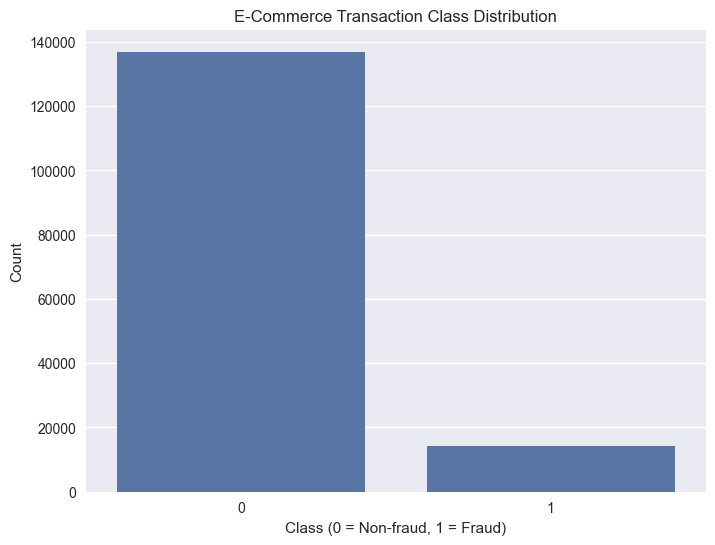

In [5]:

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=fraud_data)
plt.title('E-Commerce Transaction Class Distribution')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.savefig('visualizations/ecommerce_class_distribution.png')
plt.show()

#### Fraud vs Non-fraud transactions in credit card data

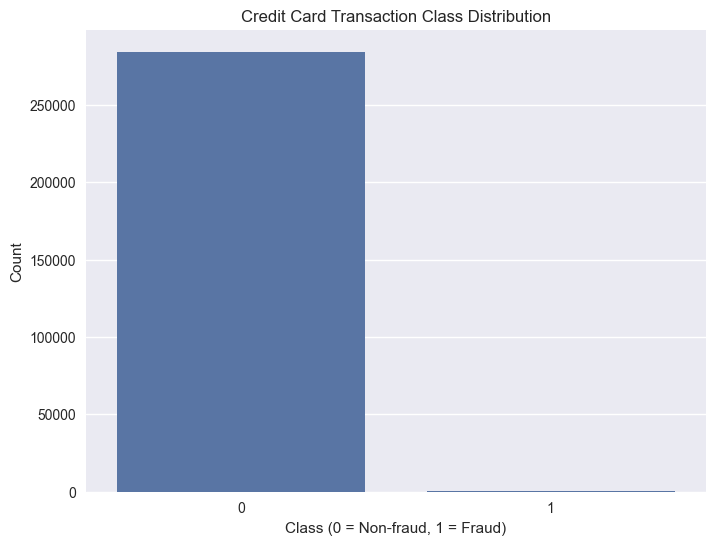

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=creditcard_data)
plt.title('Credit Card Transaction Class Distribution')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.savefig('visualizations/creditcard_class_distribution.png')
plt.show()

## Feature Analysis

### E-Commerce Data Analysis

#### Time since signup vs Fraud

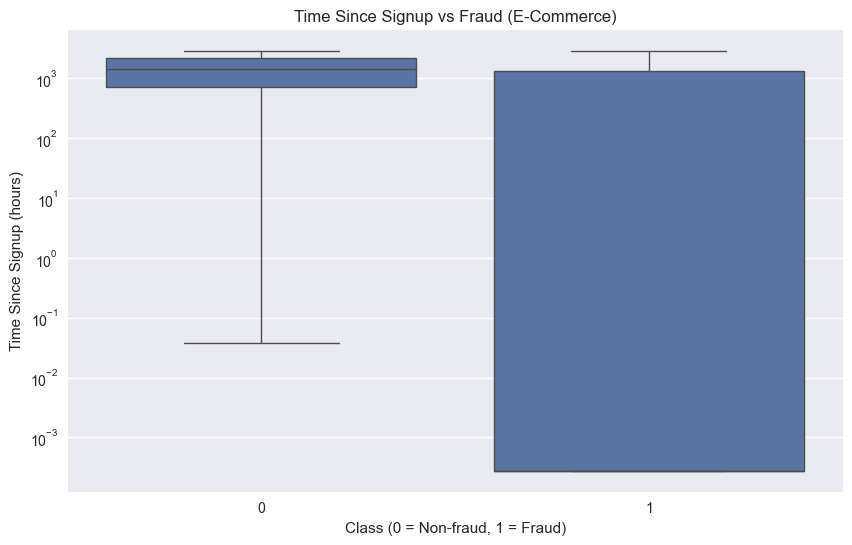

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='time_since_signup', data=fraud_data)
plt.title('Time Since Signup vs Fraud (E-Commerce)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Time Since Signup (hours)')
plt.yscale('log')
plt.savefig('visualizations/time_since_signup_vs_fraud.png')
plt.show()

#### Purchase value vs Fraud

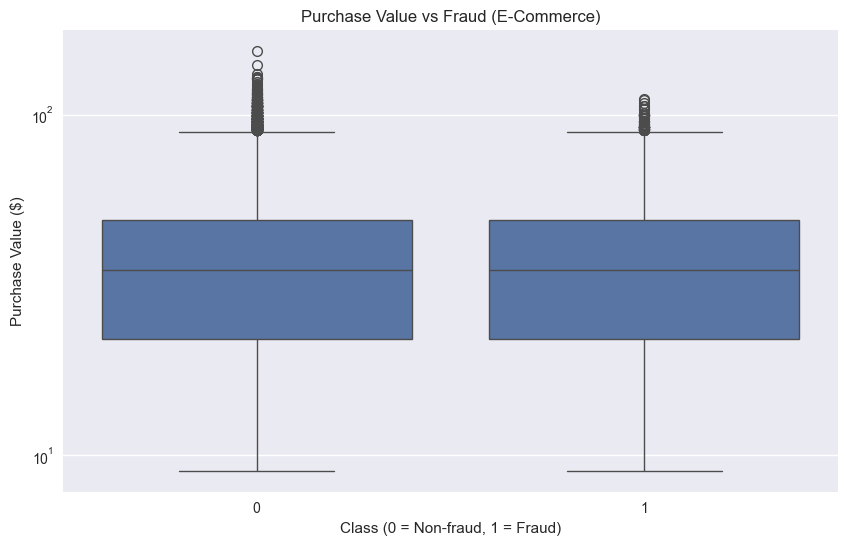

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value vs Fraud (E-Commerce)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Purchase Value ($)')
plt.yscale('log')
plt.savefig('visualizations/purchase_value_vs_fraud.png')
plt.show()

#### Purchase hour vs Fraud

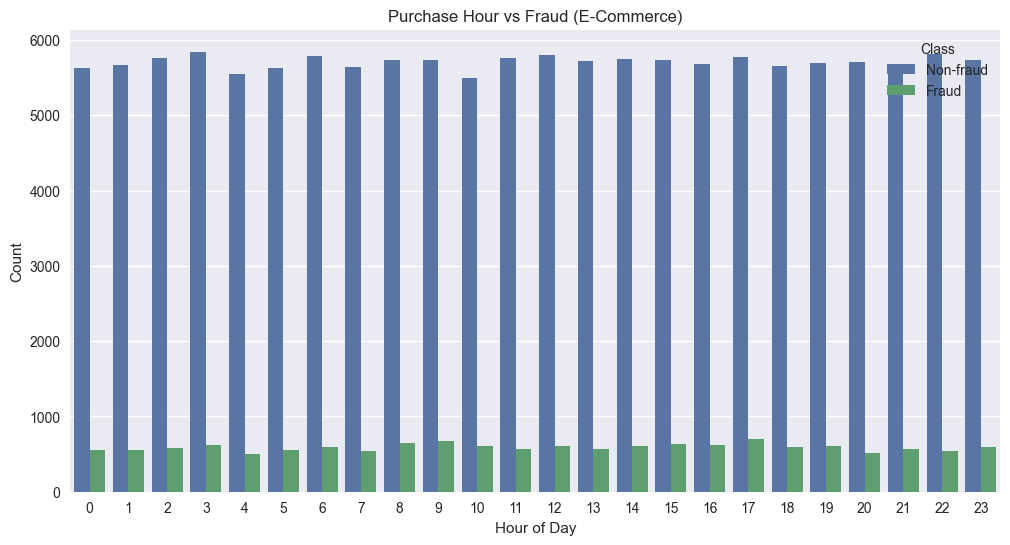

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purchase_hour', hue='class', data=fraud_data)
plt.title('Purchase Hour vs Fraud (E-Commerce)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Non-fraud', 'Fraud'])
plt.savefig('visualizations/purchase_hour_vs_fraud.png')
plt.show()

#### Purchase day of week vs Fraud

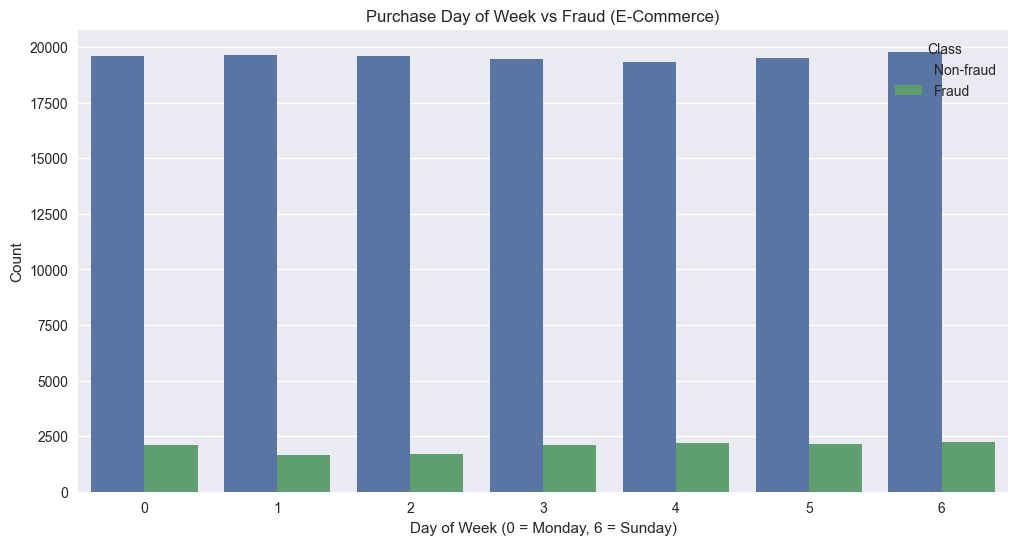

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purchase_day_of_week', hue='class', data=fraud_data)
plt.title('Purchase Day of Week vs Fraud (E-Commerce)')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Non-fraud', 'Fraud'])
plt.savefig('visualizations/purchase_day_of_week_vs_fraud.png')
plt.show()

### Credit Card Data Analysis

#### Amount vs Fraud

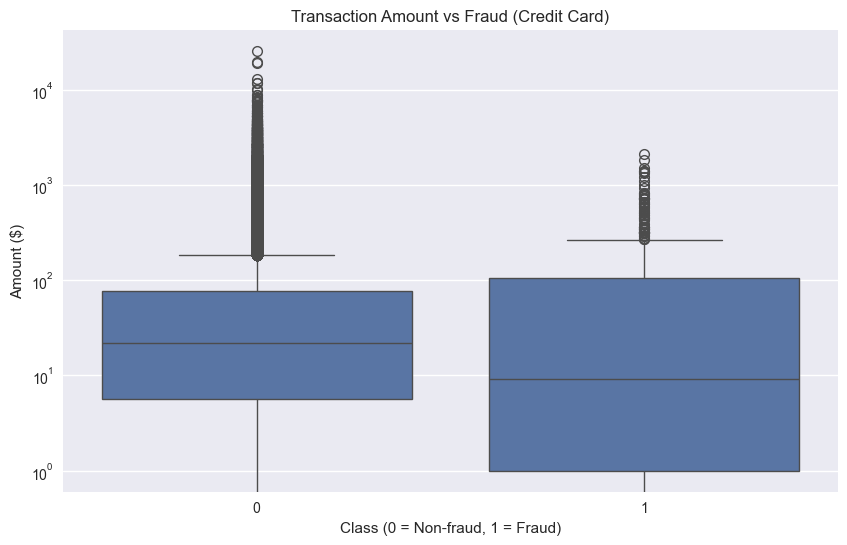

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=creditcard_data)
plt.title('Transaction Amount vs Fraud (Credit Card)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Amount ($)')
plt.yscale('log')
plt.savefig('visualizations/creditcard_amount_vs_fraud.png')
plt.show()

## Correlation Analysis (Credit Card Data)

### Correlation matrix for credit card data

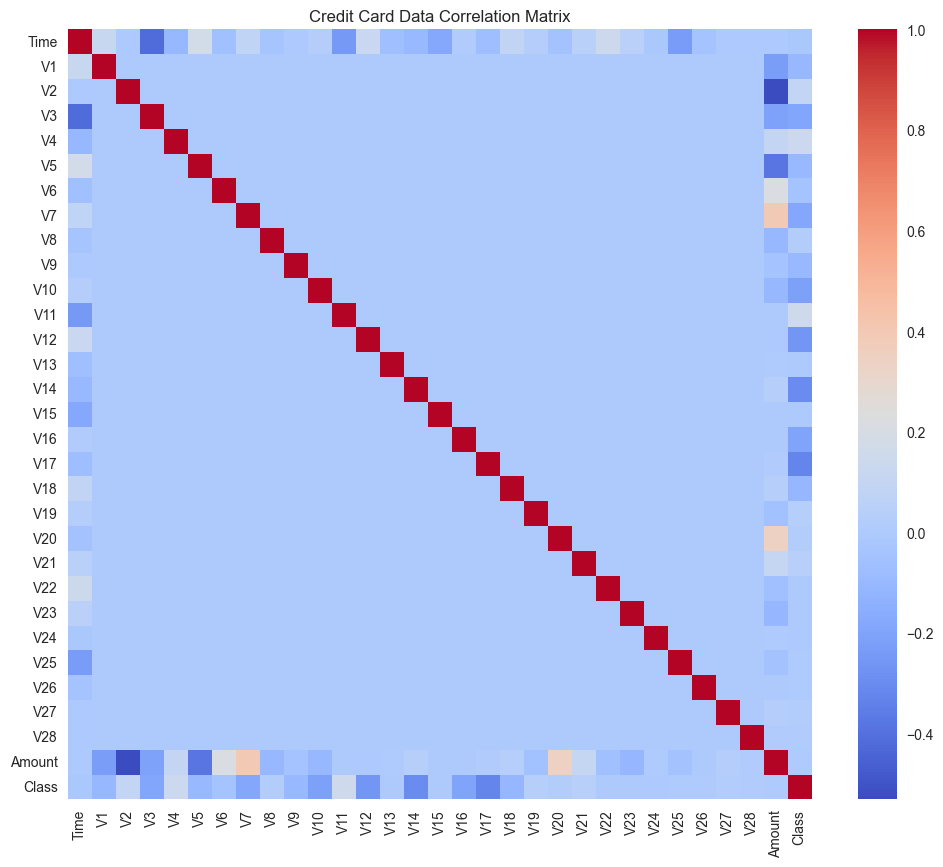

In [12]:
plt.figure(figsize=(12, 10))
corr = creditcard_data.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Credit Card Data Correlation Matrix')
plt.savefig('visualizations/creditcard_correlation_matrix.png')
plt.show()

## Country Analysis (E-Commerce Data)

### Top countries by transaction volume

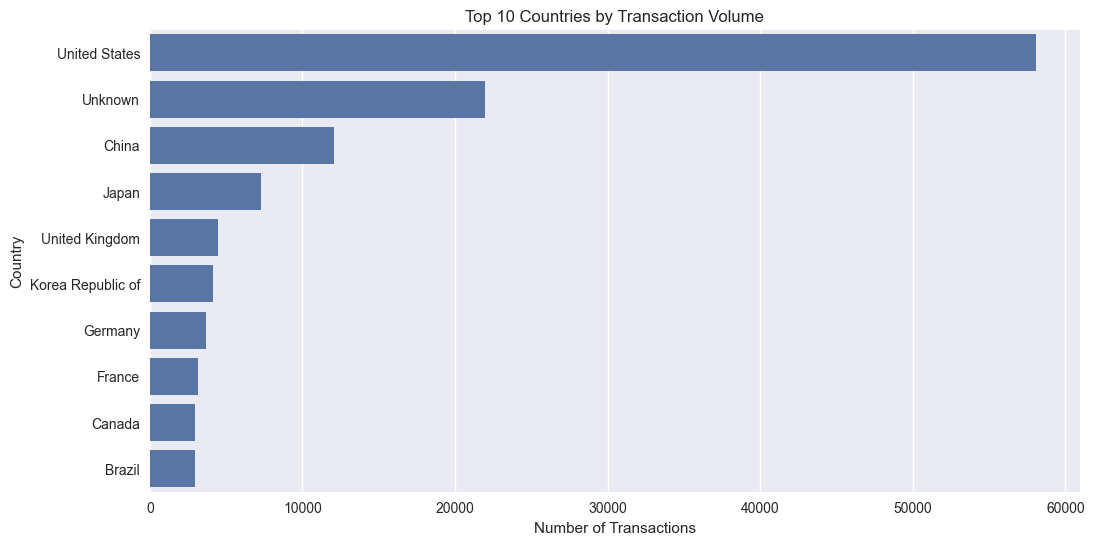

In [13]:
top_countries = fraud_data['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=fraud_data, order=top_countries.index)
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.savefig('visualizations/top_countries.png')
plt.show()

## Apply SMOTE for Oversampling

In [9]:
# Define features
categorical_features = ['source', 'browser', 'sex']
numerical_features = ['purchase_hour', 'purchase_day_of_week', 'time_since_signup', 'purchase_value', 'age']

# Prepare e-commerce data
X_ecommerce = fraud_data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 
                               'ip_address', 'ip_numeric', 'country', 'class'], axis=1)
y_ecommerce = fraud_data['class']

# Train-test split
X_train_ecommerce, X_test_ecommerce, y_train_ecommerce, y_test_ecommerce = train_test_split(
    X_ecommerce, y_ecommerce, test_size=0.2, stratify=y_ecommerce, random_state=42)

# Define preprocessing and SMOTE pipeline for e-commerce data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Full pipeline: preprocess -> resample -> model
from imblearn.pipeline import Pipeline

ecommerce_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
])

# Apply pipeline to e-commerce data
X_resampled_ecommerce, y_resampled_ecommerce = ecommerce_pipeline.fit_resample(
    X_train_ecommerce, y_train_ecommerce
)

# Prepare credit card data
numerical_features_credit = creditcard_data.columns.drop(['Class', 'Time'])

X_creditcard = creditcard_data.drop(['Class', 'Time'], axis=1)
y_creditcard = creditcard_data['Class']

# Train-test split
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(
    X_creditcard, y_creditcard, test_size=0.2, stratify=y_creditcard, random_state=42)

# Apply SMOTE to handle class imbalance (credit card data has only numerical features)
smote = SMOTE(random_state=42)
X_resampled_credit, y_resampled_credit = smote.fit_resample(
    X_train_credit, y_train_credit
)

### Visualize Class Distribution After SMOTE

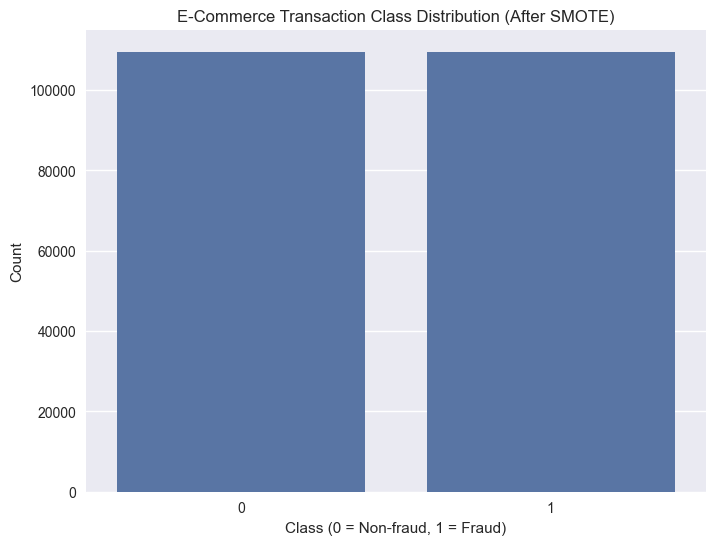

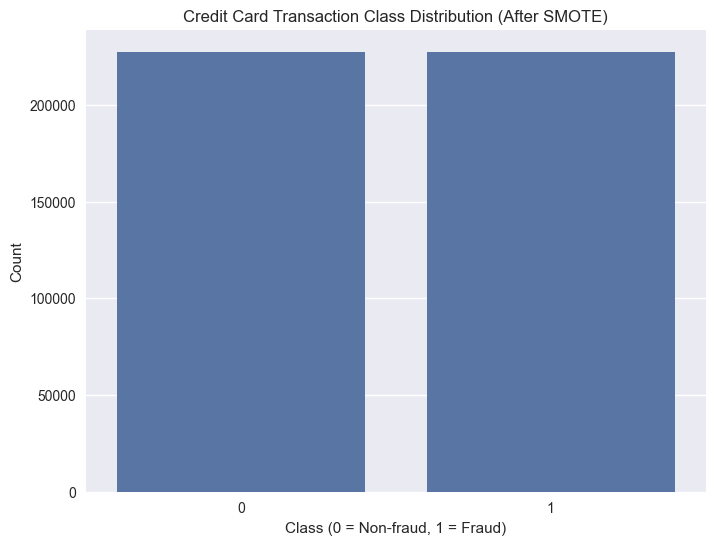

In [10]:
# Plot class distribution after SMOTE for E-Commerce
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled_ecommerce)
plt.title('E-Commerce Transaction Class Distribution (After SMOTE)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# Plot class distribution after SMOTE for Credit Card
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled_credit)
plt.title('Credit Card Transaction Class Distribution (After SMOTE)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

## Data Transformation

### Normalization and Scaling

In [12]:
# Normalize numerical features for e-commerce data
scaler = StandardScaler()
# For numpy arrays, select columns by integer indices (first 5 columns are numerical features)
X_resampled_ecommerce[:, :5] = scaler.fit_transform(X_resampled_ecommerce[:, :5])
X_test_ecommerce[numerical_features] = scaler.transform(X_test_ecommerce[numerical_features])

# Normalize numerical features for credit card data
scaler_credit = StandardScaler()
X_resampled_credit = scaler_credit.fit_transform(X_resampled_credit)
X_test_credit = scaler_credit.transform(X_test_credit)

c:\Users\የአብትዕግስት\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Categorical Encoding

In [14]:
# The pipeline output is already fully preprocessed (scaled + one-hot encoded)
X_resampled_final = X_resampled_ecommerce
X_test_final = X_test_ecommerce

## Visualizations and Insights

### Class Distribution After SMOTE

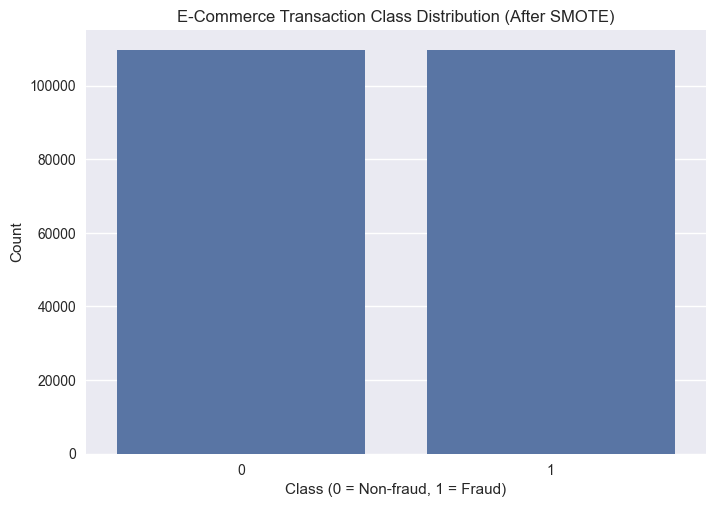

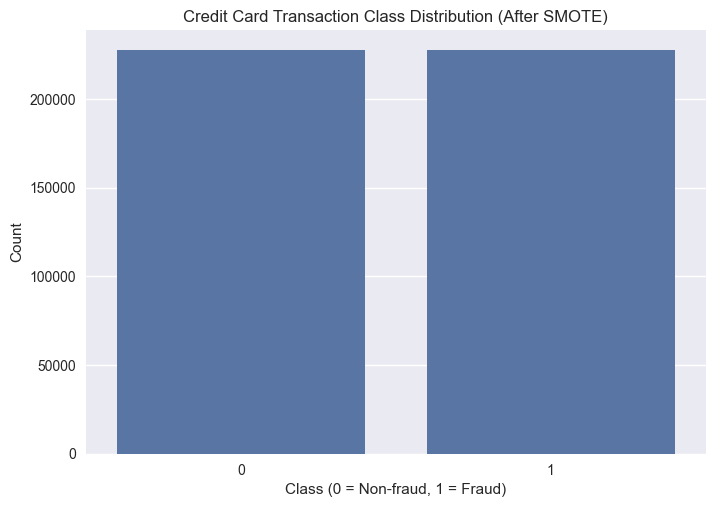

In [15]:
# E-Commerce
sns.countplot(x=y_resampled_ecommerce)
plt.title('E-Commerce Transaction Class Distribution (After SMOTE)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# Credit Card
sns.countplot(x=y_resampled_credit)
plt.title('Credit Card Transaction Class Distribution (After SMOTE)')
plt.xlabel('Class (0 = Non-fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

### Correlation Analysis (Credit Card)

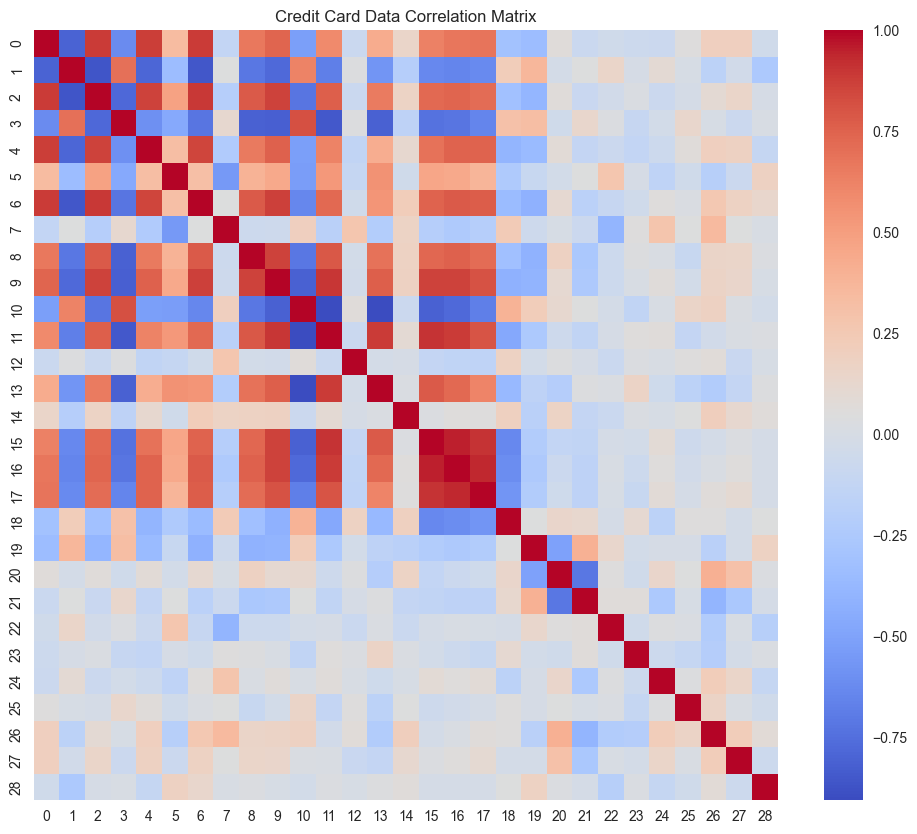

In [16]:
# Correlation matrix for credit card data
plt.figure(figsize=(12, 10))
corr = pd.DataFrame(X_resampled_credit).corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Credit Card Data Correlation Matrix')
plt.show()

# 🧠 Feature Engineering for Fraud Detection

This section outlines the feature engineering strategies used to enhance the performance and business alignment of our fraud detection models for e-commerce and banking transactions. Special emphasis was placed on **time-based**, **geolocation**, and **velocity** features—each designed to capture critical fraud signals grounded in real-world behavior.

---

## ⏰ 1. Time-Based Features

### 🔧 Engineered Features

- `purchase_hour` — Hour of the day when the transaction occurred  
- `purchase_day_of_week` — Day of the week when the transaction occurred  
- `time_since_signup` — Hours elapsed between signup and purchase time  

### 💼 Business Justification

These features reflect **temporal behavior patterns**, which are often indicative of fraudulent activity:

- **`purchase_hour` & `purchase_day_of_week`**  
  - Fraud commonly occurs at night or on weekends when customer service is less responsive.
  - These features help detect abnormal activity outside regular purchase patterns.

- **`time_since_signup`**  
  - Fraudsters frequently create new accounts and make quick purchases to avoid detection.
  - A very short signup-to-purchase interval is a strong **red flag**.

### 📊 Insights

- Fraud is more frequent during **off-peak hours and weekends**.
- Many fraud cases occurred **shortly after account creation**.

---

## 🌐 2. Geolocation Mapping from IP Addresses

### 🔧 Engineered Feature

- `country` — Derived from IP address using the `IpAddress_to_Country.csv` mapping

### 💼 Business Justification

Geolocation helps assess **regional risk**:

- Some countries are statistically more associated with cybercrime or payment fraud.
- Transactions from unusual or high-risk countries can be flagged for further validation.

### 📊 Insights

- A handful of countries contribute to the **majority of transactions**.
- Some regions exhibit a **disproportionately high fraud rate**.

---

## ⚡ 3. Velocity Features

### 🔧 Engineered Feature

- `transaction_count_last_24h` — Number of user transactions in the last 24 hours

### 💼 Business Justification

Velocity patterns help detect **bot-like activity**:

- Fraud actors often attempt multiple transactions in a short timeframe (e.g., card testing or credential stuffing).
- High-frequency transactions from a single account can signal **automated or malicious activity**.

### 📊 Insights

- Fraudsters tend to have **significantly higher transaction velocity** than legitimate users.
- This feature can be used as a **real-time fraud trigger** in production systems.

---

## 📋 Summary of Engineered Features

| Feature Name                  | Type        | Source                             | Business Relevance                                  |
|------------------------------|-------------|------------------------------------|-----------------------------------------------------|
| `purchase_hour`              | Time-based  | `purchase_time`                    | Detects unusual transaction timing                  |
| `purchase_day_of_week`       | Time-based  | `purchase_time`                    | Highlights suspicious purchase patterns             |
| `time_since_signup`          | Time-based  | `signup_time`, `purchase_time`     | Flags high-risk newly created accounts              |
| `country`                    | Geolocation | `ip_address`, external mapping     | Detects high-risk geographic regions                |
| `transaction_count_last_24h` | Velocity    | `purchase_time`, `user_id`         | Identifies rapid transaction behavior               |

---

## 📌 Business Value of Engineered Features

- ✅ **Improved Model Accuracy**  
  Features offer behavioral context often missing in raw data.

- 🚫 **Reduced False Positives**  
  Better distinction between legitimate users and fraud attempts.

- 📣 **Actionable in Production**  
  Features like `country` and `transaction_count_last_24h` can trigger real-time alerts.

- 🔍 **Explainability**  
  These features are **human-interpretable**, helping communicate model logic to stakeholders, regulators, and end-users.

---

## 🔮 Next Steps

- Integrate features into **model training pipelines**
- Use **SHAP values** to measure feature importance and contribution
- Continuously refine feature engineering using **business feedback** and **model diagnostics**

---

## ✅ Conclusion

The project introduces a comprehensive set of **business-driven features** that significantly enhance the ability to detect and explain fraud. These features will not only improve predictive accuracy but also power **real-time fraud detection**, **risk scoring**, and **user verification systems** in production.

> With context-rich, interpretable features, our fraud detection system becomes more accurate, transparent, and aligned with real-world business needs.

---
